In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats as st
import seaborn as sb
sb.set()

import import_ipynb
import metadata_options

importing Jupyter notebook from metadata_options.ipynb


### For main dataset 

In [2]:
df = pd.read_csv('./data/kokil dec 6 reprepare/conf_pc_worker_sem.csv')
df = df.dropna()

TP1: weighted by 1 average per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
WT1: weighted by 1 average per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
PC1: weighted by 1 average per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
TL1: weighted by 1 normalised number of characters per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
SP1: weighted by average of TP1 and TP2 per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)


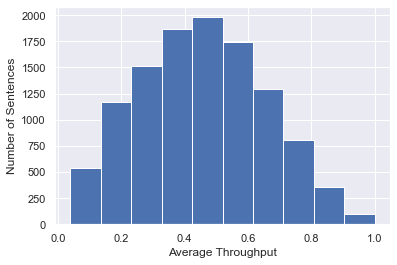

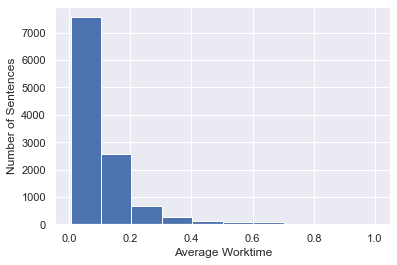

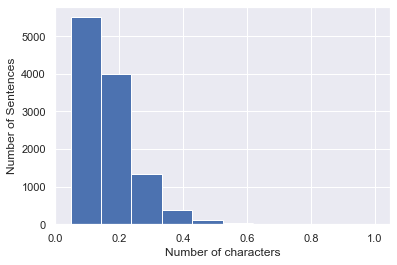

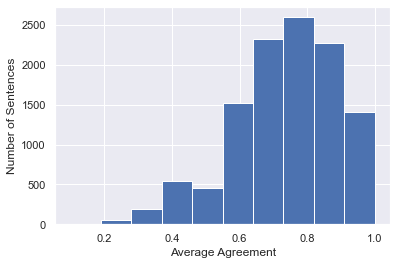

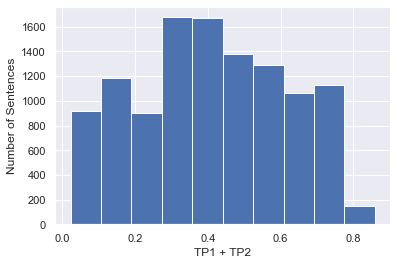

In [30]:
throughput_option = 'TP1'
worktime_option = 'WT1'
pc_agreement_option = 'PC1'
textlength_option = 'TL1'
special_option = 'SP1'
k_option_for_tp = 1
metadata_options_choices = [throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp]

df_throughput, df_worktime, df_agreement, df_textlength, df_special = metadata_options.set_OHE_pipeline_options(df, throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp)

plt.figure()
hist = df_throughput['avg_throughput'].hist()
plt.xlabel('Average Throughput')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_throughput_avg.png')

plt.figure()
hist = df_worktime['avg_worktime'].hist()
plt.xlabel('Average Worktime')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_worktime_avg.png')

plt.figure()
hist = df_textlength['Input.num_characters'].hist()
plt.xlabel('Number of characters')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_textlength_numchars.png')

plt.figure()
hist = df_agreement['avg_agreement'].hist()
plt.xlabel('Average Agreement')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_agreement_avg.png')

plt.figure()
hist = df_special['average_avg_var'].hist()
plt.xlabel('TP1 + TP2')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_special_1.png')

In [29]:
df_agreement.head(2)

,Answer.1gamemove.yes_pc_agree,Answer.2reasoning.yes_pc_agree,Answer.4shareinformation.yes_pc_agree,Answer.3rapport.yes_pc_agree,avg_agreement
5,1.0,0.8,1.0,0.8,0.9
6,1.0,0.6,0.8,0.8,0.8


TP2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
Plot below: old throughput (x-axis) vs new throughput (y-axis)
WT2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
PC2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
TL2: weighted by 1 normalised number of words per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
SP2: weighted by average of WT1 and WT2 per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)


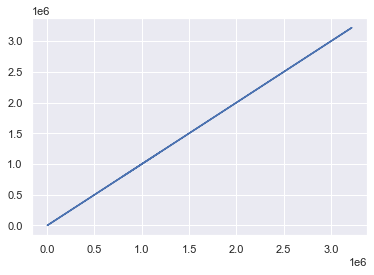

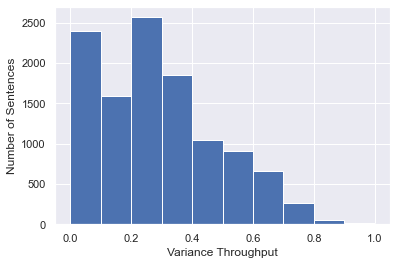

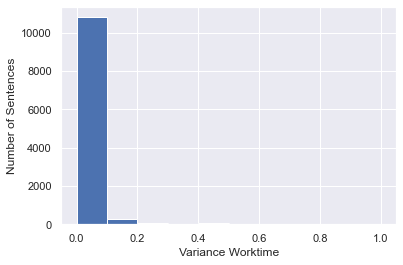

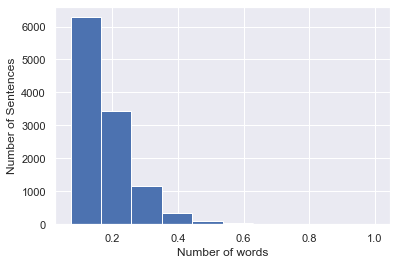

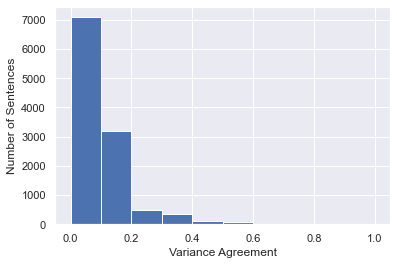

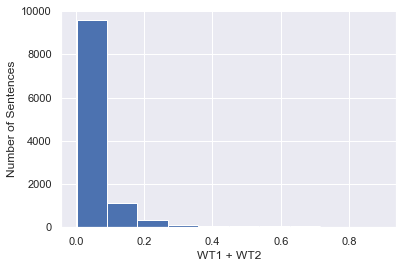

In [27]:
throughput_option = 'TP2'
worktime_option = 'WT2'
pc_agreement_option = 'PC2'
textlength_option = 'TL2'
special_option = 'SP2'
k_option_for_tp = 3
metadata_options_choices = [throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp]

df_throughput, df_worktime, df_agreement, df_textlength, df_special = metadata_options.set_OHE_pipeline_options(df, throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp)

plt.figure()
hist = df_throughput['var_throughput'].hist()
plt.xlabel('Variance Throughput')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_throughput_var.png')

plt.figure()
hist = df_worktime['var_worktime'].hist()
plt.xlabel('Variance Worktime')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_worktime_var.png')

plt.figure()
hist = df_textlength['Input.num_words'].hist()
plt.xlabel('Number of words')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_textlength_words.png')

plt.figure()
hist = df_agreement['var_agreement'].hist()
plt.xlabel('Variance Agreement')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_agreement_var.png')

plt.figure()
hist = df_special['average_avg_var'].hist()
plt.xlabel('WT1 + WT2')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_special_2.png')

TP3 + k: weighted by 1 inverted k-power U-shaped variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
Plot below: old throughput (x-axis) vs new throughput (y-axis)
WT2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
PC3: weighted by 1 PC agreement weight per annotation in each OHE, i.e. (a, b, c, d) -> (w1*a, w2*b, w3*c, w4*d)
TL2: weighted by 1 normalised number of words per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
SP3: weighted by average of PC1 and PC2 per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)


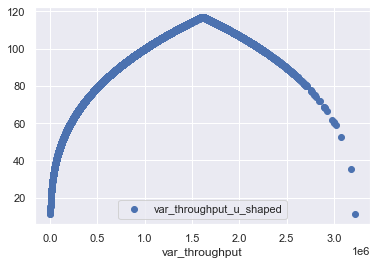

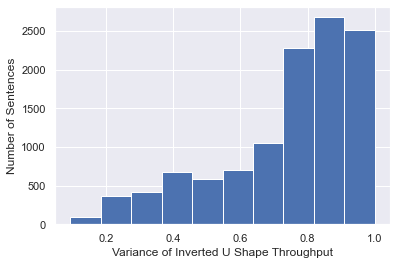

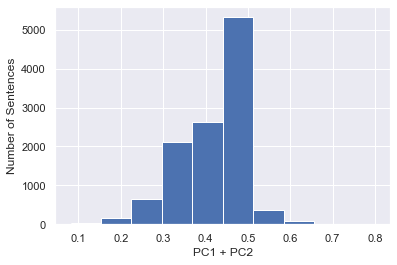

In [37]:
throughput_option = 'TP3'
worktime_option = 'WT2'
pc_agreement_option = 'PC3'
textlength_option = 'TL2'
special_option = 'SP3'
k_option_for_tp = 3
metadata_options_choices = [throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp]

df_throughput, df_worktime, df_agreement, df_textlength, df_special = metadata_options.set_OHE_pipeline_options(df, throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp)

plt.figure()
hist = df_throughput['var_throughput_u_shaped'].hist()
plt.xlabel('Variance of Inverted U Shape Throughput')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_throughput_u_var.png')

plt.figure()
hist = df_special['average_avg_var'].hist()
plt.xlabel('PC1 + PC2')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_special_3.png')

TP4 + k: weighted by 1 upright k-power U-shaped variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
Plot below: old throughput (x-axis) vs new throughput (y-axis)
WT2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
PC3: weighted by 1 PC agreement weight per annotation in each OHE, i.e. (a, b, c, d) -> (w1*a, w2*b, w3*c, w4*d)
TL2: weighted by 1 normalised number of words per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
# RAND_NORM: weighted by 1 normally distributed random number between 0 to 1 per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)


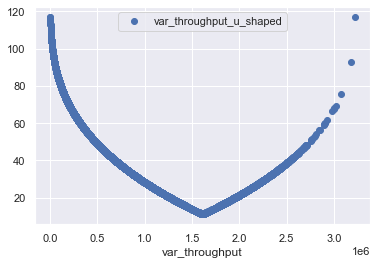

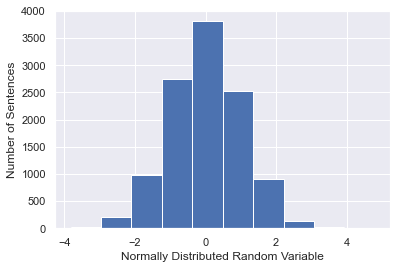

In [41]:
throughput_option = 'TP4'
worktime_option = 'WT2'
pc_agreement_option = 'PC3'
textlength_option = 'TL2'
special_option = 'RAND_NORM'
k_option_for_tp = 3
metadata_options_choices = [throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp]

df_throughput, df_worktime, df_agreement, df_textlength, df_special = metadata_options.set_OHE_pipeline_options(df, throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp)

plt.figure()
hist = df_special['special_norm'].hist()
plt.xlabel('Normally Distributed Random Variable')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_special_5.png')

TP4 + k: weighted by 1 upright k-power U-shaped variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
Plot below: old throughput (x-axis) vs new throughput (y-axis)
WT2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
PC3: weighted by 1 PC agreement weight per annotation in each OHE, i.e. (a, b, c, d) -> (w1*a, w2*b, w3*c, w4*d)
TL2: weighted by 1 normalised number of words per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
RAND_UNI: weighted by 1 uniformly distributed random number between 0 to 1 per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)


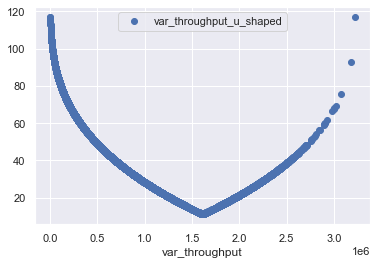

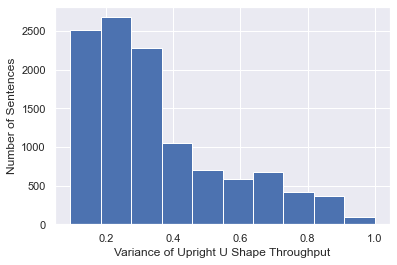

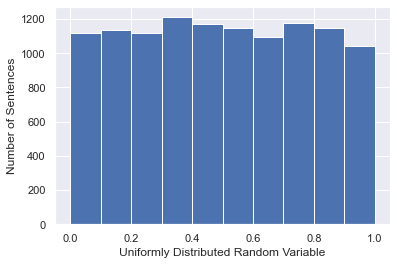

In [42]:
throughput_option = 'TP4'
worktime_option = 'WT2'
pc_agreement_option = 'PC3'
textlength_option = 'TL2'
special_option = 'RAND_UNI'
k_option_for_tp = 3
metadata_options_choices = [throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp]

df_throughput, df_worktime, df_agreement, df_textlength, df_special = metadata_options.set_OHE_pipeline_options(df, throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp)

plt.figure()
hist = df_throughput['var_throughput_u_shaped'].hist()
plt.xlabel('Variance of Upright U Shape Throughput')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_throughput_u_var.png')

plt.figure()
hist = df_special['special_uni'].hist()
plt.xlabel('Uniformly Distributed Random Variable')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_special_4.png')